## Interference with polarization

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Define Jones vectors for the two beams
def jones_vector(amp, type ,phase_x, phase_y):
    if type == 'horizontal': 
        return np.array([
            1,  # X-component
            0   # Y-component
        ])
    elif type == 'vertical': 
        return np.array([
            0,  # X-component
            1   # Y-component
        ])
    elif type == 'right':
        return np.array([
           1/np.sqrt(2) * 1,    # X-component
           1/np.sqrt(2) * -1j   # Y-component
        ])
    elif type == 'left':
        return np.array([
           1/np.sqrt(2) * 1,    # X-component
           1/np.sqrt(2) * 1j   # Y-component
        ])
    else:
        return np.array([
           amp * np.exp(1j * phase_x),  # X-component
           amp * np.exp(1j * phase_y)   # Y-component
        ])

# Wave generatot for plane and spherical waves
def wave_generator(type1, type2, lambda1, lambda2, z1, z2, X, Y):
    k1 = 2 * np.pi / lambda1  
    k2 = 2 * np.pi / lambda2  

    if type1 == 'plane':
        phase_E1 = k1 * X       #Travelling along X-axis by default 
    elif type1 == 'spherical':
        phase_E1 = k1 * np.sqrt(X**2 + Y**2 + z1**2)
    
    if type2 == 'plane':    
        phase_E2 = k2 * X       #Travelling along Y-axis by default 
    elif type2 == 'spherical':
        phase_E2 = k2 * np.sqrt(X**2 + Y**2 + z2**2)

    return phase_E1, phase_E2


def Efield_generator(jvector1, jvector2, phase1, phase2):
    Efield1 = np.array([
        jvector1[0] * np.exp(1j * phase1),  # X-component of beam 1
        jvector1[1] * np.exp(1j * phase1)   # Y-component of beam 1
    ])

    Efield2 = np.array([
        jvector2[0] * np.exp(1j * phase2),  # X-component of beam 2
        jvector2[1] * np.exp(1j * phase2)   # Y-component of beam 2
    ])

    return Efield1, Efield2



In [150]:
# Parameters for beam 1
amp1 = 1             
phase_x1 = np.pi      
phase_y1 = np.pi/4  

# Parameters for beam 2
amp2 = 1            
phase_x2 = np.pi/2  
phase_y2 = 0  

amp3 = 1
amp4 = 1

# Define spatial grid for interference pattern
x = np.linspace(-15, 15, 500)   # x-coordinates
y = np.linspace(-15, 15, 500)   # y-coordinates
X, Y = np.meshgrid(x, y)


# Define wave numbers for both beams
wavelength1 =  0.75  #  μm wavelength
wavelength2 = 0.6   # μm wavelength
z1 = 1     # distance from the source (for spherical wave interference pattern)
z2 = 1    # distance from the source (for spherical wave interference pattern)


In [151]:
# Create Jones vectors for both beams
E1 = jones_vector(
    amp1, '' ,phase_x1, phase_y1
)

E2 = jones_vector(
    amp2, '' ,phase_x2, phase_y2
)

phase_E1, phase_E2 = wave_generator(
    'plane', 'plane', wavelength1, wavelength2, z1, z2, X, Y
)

# Electric fields of the two beams at each (x, y) position
E_field_1, E_field_2 = Efield_generator(
    E1, E2, phase_E1, phase_E2
)


In [152]:
# Resultant field: sum of both fields
E_total = E_field_1 + E_field_2

# Calculate intensity as the squared magnitude of the resultant field
intensity = np.abs(E_total[0])**2 + np.abs(E_total[1])**2

intensity_max = np.max(intensity)

Comparison with different amplitude plane waves 

In [153]:
# Create Jones vectors for both beams
E3 = jones_vector(
    amp3, '' ,phase_x1, phase_y1
)

E4 = jones_vector(
    amp4, '' ,phase_x2, phase_y2
)

phase_E3, phase_E4 = wave_generator(
    'plane', 'plane', wavelength1, wavelength2, z1, z2, X, Y
)

# Electric fields of the two beams at each (x, y) position
E_field_3, E_field_4 = Efield_generator(
    E3, E4, phase_E3, phase_E4
)

# Resultant field: sum of both fields
E_total_2 = E_field_3 + E_field_4

# Calculate intensity as the squared magnitude of the resultant field
intensity_2 = np.abs(E_total_2[0])**2 + np.abs(E_total_2[1])**2

intensity_2 = intensity_2 / intensity_max

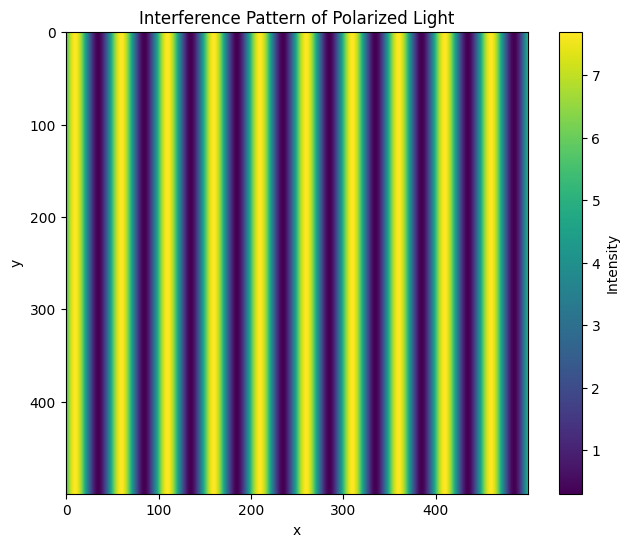

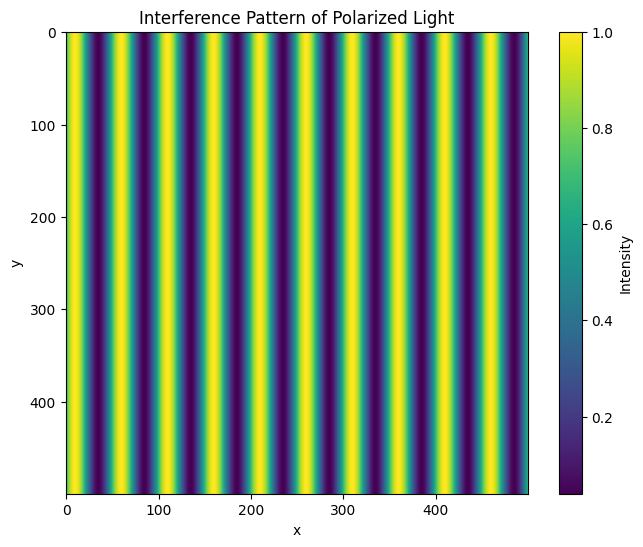

In [154]:
# Plot the resulting interference pattern
plt.figure(figsize=(8, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(intensity_2, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()

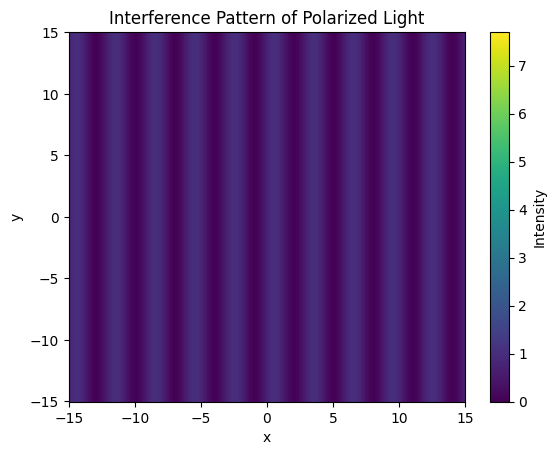

In [162]:
fig, ax = plt.subplots()

c = ax.pcolormesh(X, Y, intensity_2, vmin=0, vmax=intensity_max)

# Add colorbar
fig.colorbar(c, ax=ax, label='Intensity')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interference Pattern of Polarized Light')

plt.show()